In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [41]:
#1. Create a DataFrame with columns for "Student Name," "Math Score," "Science Score," and "English Score." 
#Calculate the average score for each student. Identify students who scored below 50 in any subject.
data = {
    "student Name":['Om','Yuvraj','Mayur','Ritesh'],
    "Math score":[98,60,89,47],
    "Science score":[89,55,77,84],
    "English score":[88,78,43,89]
}
df = pd.DataFrame(data)
df["avreage score"] = df[['Math score','Science score','English score']].mean(axis=1)
df_below_50 = df[(df["Math score"]<50) | (df["Science score"]<50) | (df["English score"]<50)]
print("Students scored below 50\n",df_below_50)

Students scored below 50
   student Name  Math score  Science score  English score  avreage score
2        Mayur          89             77             43      69.666667
3       Ritesh          47             84             89      73.333333


In [85]:
#2. Given a DataFrame with sales data, including "Date," "Product," "Quantity Sold," and "Revenue," calculate the total revenue for each product.
data2 = {
    "Date":['2024-10-01','2024-10-02','2024-10-03','2024-10-02'],
    "Product":['A','B','C','D'],
    "Quantity Sold":[10,29,15,7],
    "Revenue":[200,290,150,70]
}
df = pd.DataFrame(data2)
total_revenue = df.groupby("Product")["Revenue"].sum()
print("Total revenue for each porduct is",total_revenue)

Total revenue for each porduct is Product
A    200
B    290
C    150
D     70
Name: Revenue, dtype: int64


In [105]:
#3. Create a DataFrame with columns for "Date," "City," "Temperature," and "Humidity."
#Find the average temperature for each city and identify the days when the temperature was above 30°C.
data3 = {
    'Date':['2024-08-01','2024-08-02','2024-08-01','2024-08-02'],
    'City':['Mumbai','Mumbai','Delhi','Delhi'],
    'Temperature':[32,28,35,29],
    'Humidity':[65,70,74,78]
}
df = pd.DataFrame(data3)
average_temp = df.groupby("City")["Temperature"].mean()
print("Average temperature in given cities",average_temp)
above_30 = df[df["Temperature"]>30]
print("The days with the temperature above 30\n",above_30)

Average temperature in given cities City
Delhi     32.0
Mumbai    30.0
Name: Temperature, dtype: float64
The days with the temperature above 30
          Date    City  Temperature  Humidity
0  2024-08-01  Mumbai           32        65
2  2024-08-01   Delhi           35        74


In [129]:
#4. Create a DataFrame with columns for "Employee ID," "Name," "Age," "Department," and "Salary." Sort the DataFrame by "Salary" in descending order.
data4 = {
    "Employee ID":[1,2,3,4],
    "Employee Name":["Pratik","Krishna","Ritesh","Chaitanya"],
    "Department":["HR","Engineering","Marketing","sales"],
    "salary":[37000,36000,40000,41000]
}
df = pd.DataFrame(data4)
sorted_salary = df.sort_values(by= "salary", ascending=False)
print("Employee info with sorted salary\n",sorted_salary)


Employee info with sorted salary
    Employee ID Employee Name   Department  salary
3            4     Chaitanya        sales   41000
2            3        Ritesh    Marketing   40000
0            1        Pratik           HR   37000
1            2       Krishna  Engineering   36000


In [141]:
#5. Given a DataFrame with some missing values in various columns, identify columns with missing values.
data5 = {
    "A":[20,np.nan,12,11],
    "B":[np.nan,90,7,6],
    "C":[15,22,4,13]
}
df = pd.DataFrame(data5)
missing_values = df.columns[df.isnull().any()]
print("These are the columns with null value\n",missing_values)
    

These are the columns with null value
 Index(['A', 'B'], dtype='object')


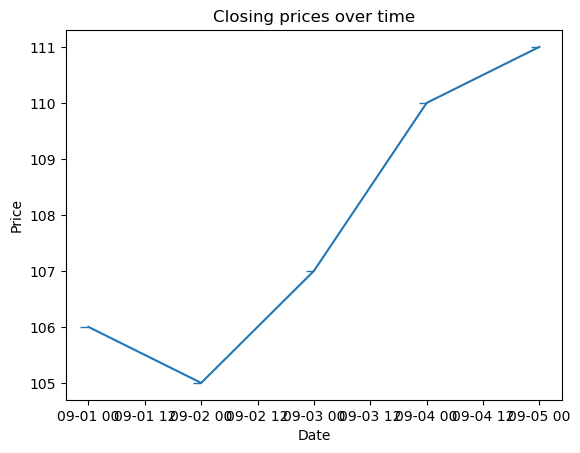

In [179]:
#6. Given a DataFrame containing stock prices with columns "Date," "Open," "Close," "High," and "Low," plot the closing prices over time.
import matplotlib.pyplot as plt
data6 = {
    "Date":pd.date_range(start="2024-09-01", periods=5),
    "Open":[101,100,102,104,107],
    "Close":[106,105,107,110,111],
    "High":[107,106,108,111,112],
    "Low":[100,99,101,103,106]
}
df = pd.DataFrame(data6)
df
plt.plot(df["Date"],df["Close"],marker=0)
plt.title("Closing prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [203]:
# 7. Create a DataFrame with a "Date" column and a "Sales" column containing daily sales data.
# Resample the data to calculate the total sales for each month.

#creating the dataframe
date_range = pd.date_range(start="2024-10-01", periods = 30)
sales = np.random.randint(100,500,size=30)
df = pd.DataFrame({"Date":date_range,"Sales":sales})

#setting date as index and resampling
df.set_index("Date",inplace=True)
monthly_sales = df.resample("ME").sum()
print("Total sales for each month:\n",monthly_sales)

Total sales for each month:
             Sales
Date             
2024-10-31   9451


In [220]:
#8. Given two DataFrames, one with customer information (Customer ID, Name) and another with order details (Customer ID, Product, Price),
#merge the two DataFrames on "Customer ID."

#creating dataframes
customer =pd.DataFrame( { 
    "Name":["OM","Ganesh","Suresh","Ravindra"], 
    "Customer ID":[2,3,4,5]
})
sales = pd.DataFrame({
    "Customer ID":[2,2,3,4,5],
    "Product":["Vadapav","Bhajepav","vadapav","Bhel","Misal"],
    "Price":[20,25,2030,40]
})
df = pd.merge(customer,sales,on="Customer ID")
df

,Name,Customer ID,Product,Price
0,OM,2,Vadapav,20
1,OM,2,Bhajepav,25
2,Ganesh,3,vadapav,20
3,Suresh,4,Bhel,30
4,Ravindra,5,Misal,40


In [223]:
#9. Given a DataFrame with some missing values in various columns, drop any rows where more than 2 columns have missing values.
# Creating the DataFrame
data = {
    "A": [1, np.nan, np.nan, 4],
    "B": [np.nan, 2, np.nan, 4],
    "C": [1, 2, np.nan, np.nan]
}
df = pd.DataFrame(data)

# Dropping rows with more than 2 missing values
df_dropped = df.dropna(thresh=len(df.columns) - 2)
print("DataFrame after dropping rows:\n", df_dropped)


DataFrame after dropping rows:
      A    B    C
0  1.0  NaN  1.0
1  NaN  2.0  2.0
3  4.0  4.0  NaN


In [225]:
#10. Given a DataFrame containing information about cars, 
#including "Make," "Model," "Year," and "Mileage," count the number of cars from each manufacturer.
# Creating the DataFrame
data = {
    "Make": ["Toyota", "Ford", "Toyota", "Honda", "Ford", "Honda"],
    "Model": ["Corolla", "Focus", "Camry", "Civic", "Mustang", "Accord"],
    "Year": [2010, 2011, 2012, 2013, 2014, 2015],
    "Mileage": [120000, 130000, 125000, 140000, 150000, 160000]
}
df = pd.DataFrame(data)

# Counting the number of cars from each manufacturer
car_counts = df["Make"].value_counts()
print("Number of cars from each manufacturer:\n", car_counts)


Number of cars from each manufacturer:
 Make
Toyota    2
Ford      2
Honda     2
Name: count, dtype: int64
